In [30]:
import torch.nn as nn
import torch
import torch.utils.data as Data
from  sklearn.datasets import load_iris
import pandas as pd
import numpy as np
def getdata():
    train_data=load_iris()
    data=train_data['data']
    labels=train_data['target'].reshape(-1,1)
    total_data=np.hstack((data,labels))
    np.random.shuffle(total_data)
    train=total_data[0:120,:-1]
    test=total_data[120:,:-1]
    train_label=total_data[0:120,-1].reshape(-1,1)
    test_label=total_data[120:,-1].reshape(-1,1)
    return data,labels,train,test,train_label,test_label
data,labels,train,test,train_label,test_label = getdata()
# 数据预处理 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
# 4.对测试数据进行归一化处理
test=scaler.transform(test)

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(train)
y_pred = kmeans.predict(test)
y_true = test_label.reshape(1,-1)[0]
print(y_true)
print(y_pred)
accuracy = float((y_pred == y_true).astype(int).sum()) / (len(y_true))
print(accuracy)

[1. 0. 2. 2. 1. 1. 0. 1. 2. 2. 0. 1. 0. 1. 2. 2. 0. 2. 1. 2. 0. 0. 0. 1.
 0. 1. 2. 1. 0. 2.]
[1 0 2 2 2 2 0 1 1 1 0 1 0 1 1 2 0 2 2 2 0 0 0 1 0 1 2 1 0 2]
0.8


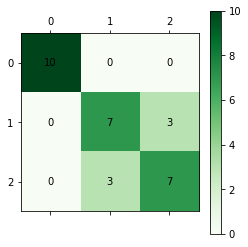

In [32]:
# 衡量模型性能

#true↓ predict→
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_true)
#print(cm)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')

In [33]:
# 分类报告
r = sm.classification_report(y_true, y_pred)
print('分类报告为：', r, sep='\n')

分类报告为：
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.70      0.70      0.70        10
         2.0       0.70      0.70      0.70        10

   micro avg       0.80      0.80      0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



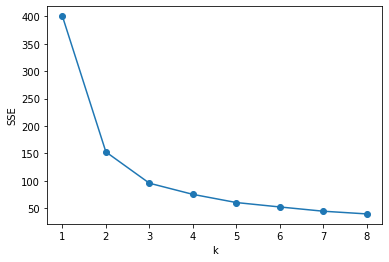

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(train)
    SSE.append(estimator.inertia_) # estimator.inertia_获取聚类准则的总和
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

[1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1]
[2 1 0 0 1 0 0 2 2 1 0 2 1 1 1 0 2 2 2 0 1 2 1 0 0 1 2 0 1 0 2 2 1 2 0 2 0
 1 0 2 1 1 1 1 1 1 1 2 1 1 1 0 2 2 2 0 1 1 0 0 1 2 2 2 1 2 2 0 2 0 0 0 1 1
 1 0 2 1 2 1 1 2 0 1 1 0 2 0 0 0 0 2 1 2 0 2 1 0 0 1]
[2 0 3 1 0 3 3 2 2 0 3 2 0 0 0 1 2 2 2 3 0 2 0 3 3 0 2 1 0 1 2 2 0 2 3 2 1
 0 3 2 0 0 0 0 0 0 0 2 0 0 0 1 2 2 2 1 0 0 3 1 0 2 2 2 0 2 2 3 2 3 1 3 0 0
 0 3 2 0 2 0 0 2 3 0 0 1 2 3 1 3 3 2 0 2 3 2 0 1 1 0]
[1 4 2 0 4 2 2 3 3 4 2 3 1 4 4 0 3 1 1 2 1 3 1 2 2 4 3 0 1 0 1 3 4 3 2 1 0
 4 2 1 1 4 1 1 1 1 4 3 4 1 1 0 3 3 1 0 1 4 2 0 1 1 3 3 4 3 3 2 1 2 0 2 1 4
 1 2 3 1 3 1 1 3 2 1 1 0 3 2 0 2 2 3 1 3 2 1 4 0 0 1]
[2 1 3 0 1 3 3 2 2 1 3 2 4 1 1 0 2 2 2 3 4 5 4 3 3 1 2 0 4 0 4 2 1 2 3 4 0
 1 3 2 4 1 4 4 4 4 1 2 1 4 4 0 2 2 4 0 4 1 3 0 4 4 5 2 1 2 2 3 2 3 0 3 4 1
 4 3 5 4 2 4 4 2 3 4 4 0 2 3 0 3 3

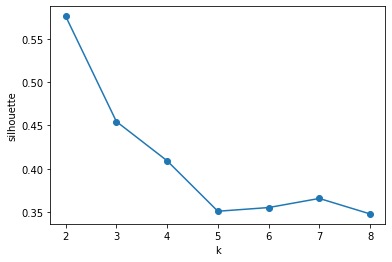

In [17]:
from sklearn import metrics
silhouette_all = []
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(train)
    y_pred = estimator.labels_
    print(y_pred)
    a = metrics.silhouette_score(train, y_pred, metric='euclidean')
    silhouette_all.append(a) # estimator.inertia_获取聚类准则的总和
X = range(2,9)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.plot(X,silhouette_all,'o-')
plt.show()